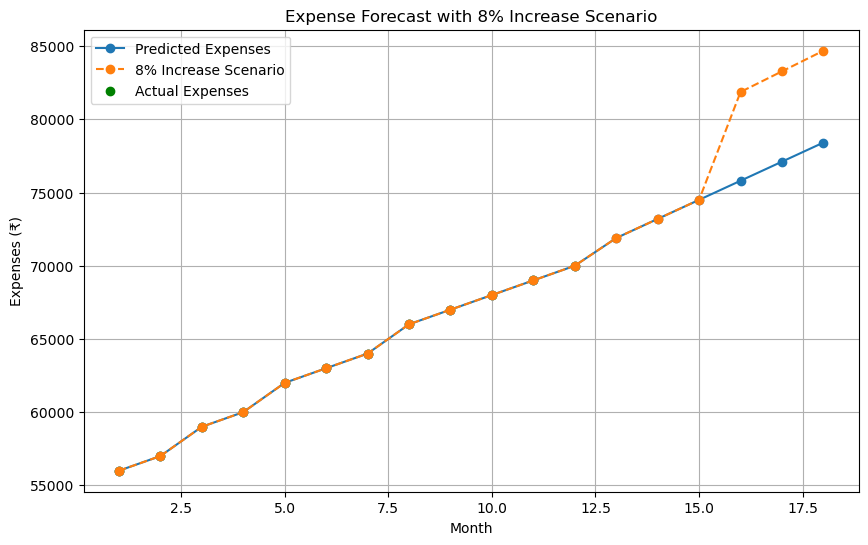

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load dataset
data = pd.read_csv('Expense_Data_TestRun2.csv')

# Split X and y
X = data[['Month_Number']]
y = data['Expenses']

# Build model
model = LinearRegression()
model.fit(X, y)

# Predict future expenses for Month 13 to 18
future_months = pd.DataFrame({'Month_Number': [13, 14, 15, 16, 17, 18]})
predictions = model.predict(future_months)

# Scenario: 8% increase from Month 4 in future values
scenario = predictions.copy()
scenario[3:] = scenario[3:] * 1.08  # Increase by 8% from Month 4 onward

# Combine for plotting
all_months = pd.concat([data, future_months])
predicted_expenses = pd.Series(np.concatenate([y.values, predictions]), name='Predicted_Expenses')
scenario_expenses = pd.Series(np.concatenate([y.values, scenario]), name='Scenario_Expenses')

# Plot
plt.figure(figsize=(10,6))
plt.plot(all_months['Month_Number'], predicted_expenses, label='Predicted Expenses', marker='o')
plt.plot(all_months['Month_Number'], scenario_expenses, label='8% Increase Scenario', linestyle='dashed', marker='o')
plt.scatter(data['Month_Number'], y, color='green', label='Actual Expenses')
plt.xlabel('Month')
plt.ylabel('Expenses (₹)')
plt.title('Expense Forecast with 8% Increase Scenario')
plt.grid(True)
plt.legend()
plt.show()
